<a href="https://colab.research.google.com/github/hamagami/preprocess/blob/main/04_09_%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# クラスタリング

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# CSVファイルの読み込み。
df = pd.read_csv("https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv")
# 前方10件を表示します。
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


欠損値チェック


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


カテゴリカルデータをエンコード
ここではgender が2値(Male Female）しかないので単純に0,1に置き換ええるだけ


In [4]:
dfx = df.copy()
dfx = dfx.replace("Male",0)
dfx = dfx.replace("Female",1)

descriveで統計値を確認し，目的変数と説明変素の関係を可視化して，クラスタの存在を調べてみる



In [10]:
dfx.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


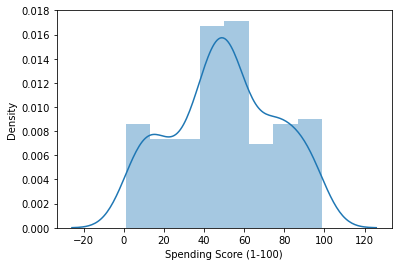

In [14]:
sns.distplot(dfx['Spending Score (1-100)'])# spending scoreはきれいな正規分布にはなっていない

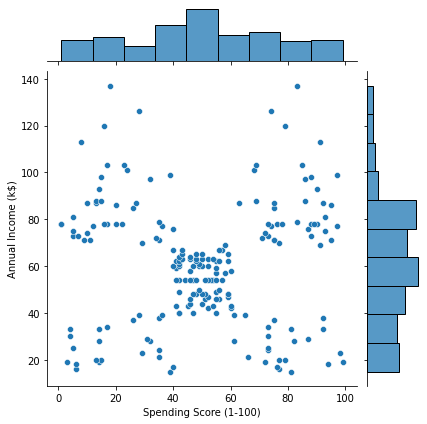

In [13]:
sns.jointplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=dfx) # annual income と　spending score は5クラスタくらいにわかれている

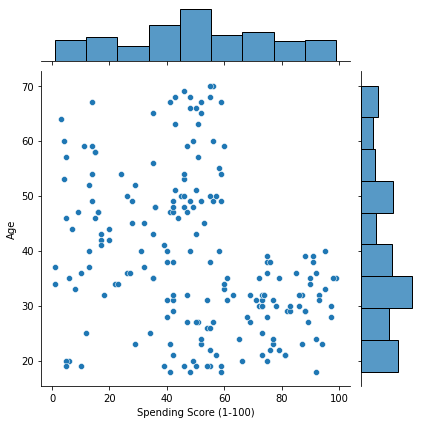

In [16]:

sns.jointplot(x='Spending Score (1-100)', y='Age', data=df) #spending score と　ageはあまりはっきりしないが3,4くらいのクラスタがありそう

クラスタリングを試す

In [21]:
pred = KMeans(n_clusters=5).fit_predict(dfx)

In [22]:
dfx['cluster_id'] = pred

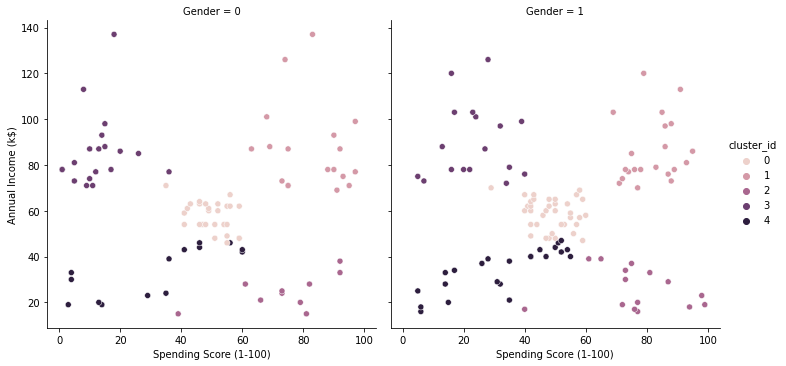

In [23]:
sns.relplot(x='Spending Score (1-100)',
                y='Annual Income (k$)', data=dfx,
                col="Gender", hue='cluster_id')

ここで得られたクラスタごとに標準化，正規化，etcによる前処理をすればよい